In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

In [2]:
imagefile = os.path.join(os.getcwd(), 'cluster1.fits')
image = fits.open(imagefile)[0].data

#clip values that are too large
clipped_image = np.clip(image, 0, np.mean(image)+0.1*np.std(image))
#scale by squaring pixel values
image_scale = np.power(clipped_image, 2)

In [3]:
catalogfile = os.path.join(os.getcwd(), 'cluster1.cat')
catalog = np.loadtxt(catalogfile)
x = catalog[:,1]
y = catalog[:,2]

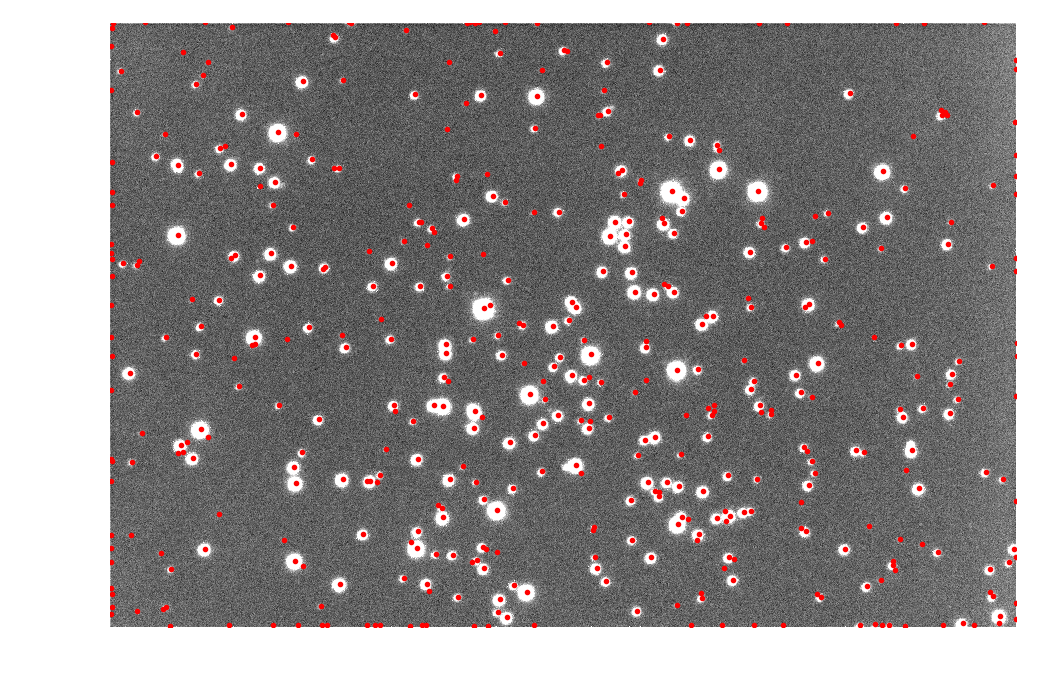

In [4]:
#plot stars from catalog on top of image
plt.figure(dpi=200)
plt.plot(x, y, '.', color='red', markersize=2)
plt.imshow(image_scale, origin='lower', cmap='gray')
plt.axis('off')
plt.show()

In [5]:
N = catalog[:,0]
mags = catalog[:,5]
mag_errs = catalog[:,6]

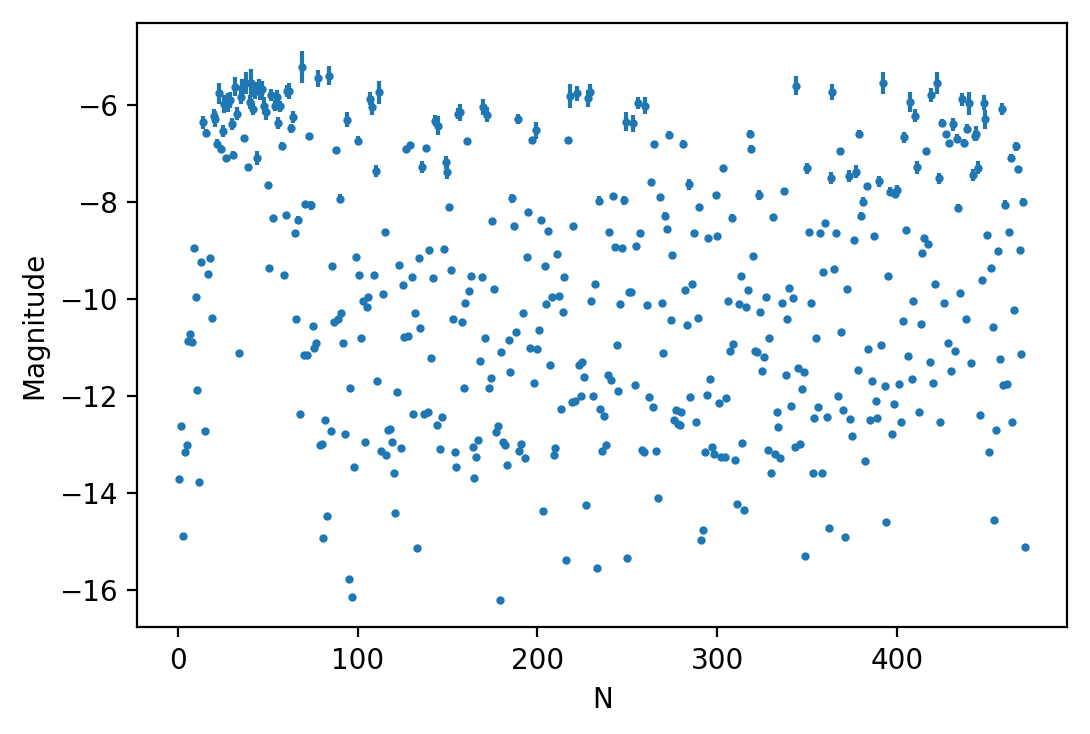

In [6]:
plt.figure(dpi=200)
plt.errorbar(N, mags, yerr=mag_errs, fmt='o', markersize=2)
plt.xlabel("N")
plt.ylabel("Magnitude")
plt.show()

In [7]:
mags_sorted_idx = np.argsort(mags)

mag_sorted = mags[mags_sorted_idx]
mag_err_sorted = mag_errs[mags_sorted_idx]

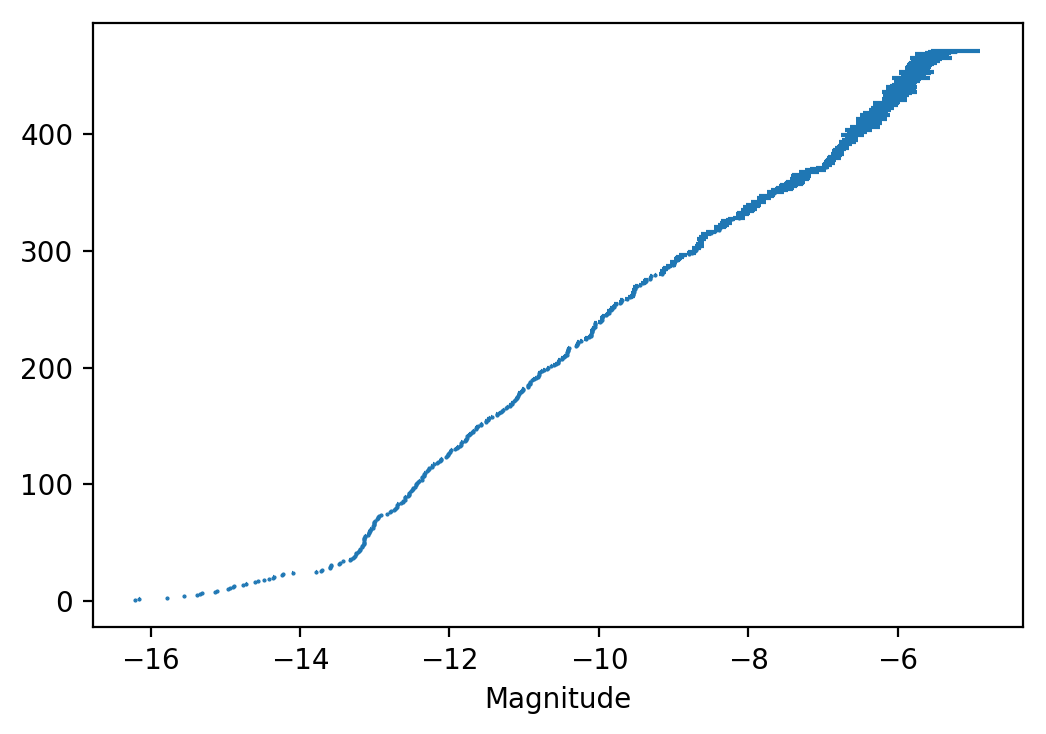

In [8]:
plt.figure(dpi=200)
plt.errorbar(mag_sorted, N, xerr=mag_err_sorted, fmt='o', markersize=0.5)
plt.xlabel("Magnitude")
plt.show()

In [9]:
flux = catalog[:, 3]

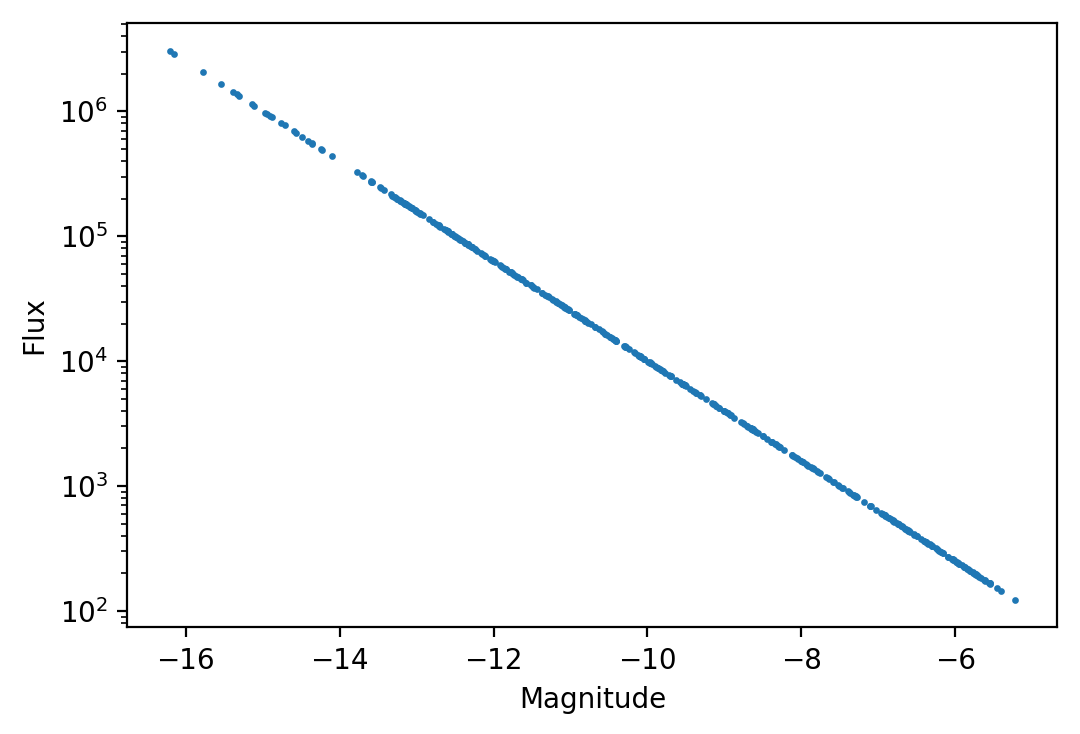

In [10]:
plt.figure(dpi=200)
plt.scatter(mags, flux, s=2)
plt.yscale('log')
plt.xlabel("Magnitude")
plt.ylabel("Flux")
plt.show()

In [11]:
x_mag = np.linspace(np.amin(mags), np.amax(mags), 100)
a = -0.397
b = 0.02
y_mag = 10**(a*x_mag + b)

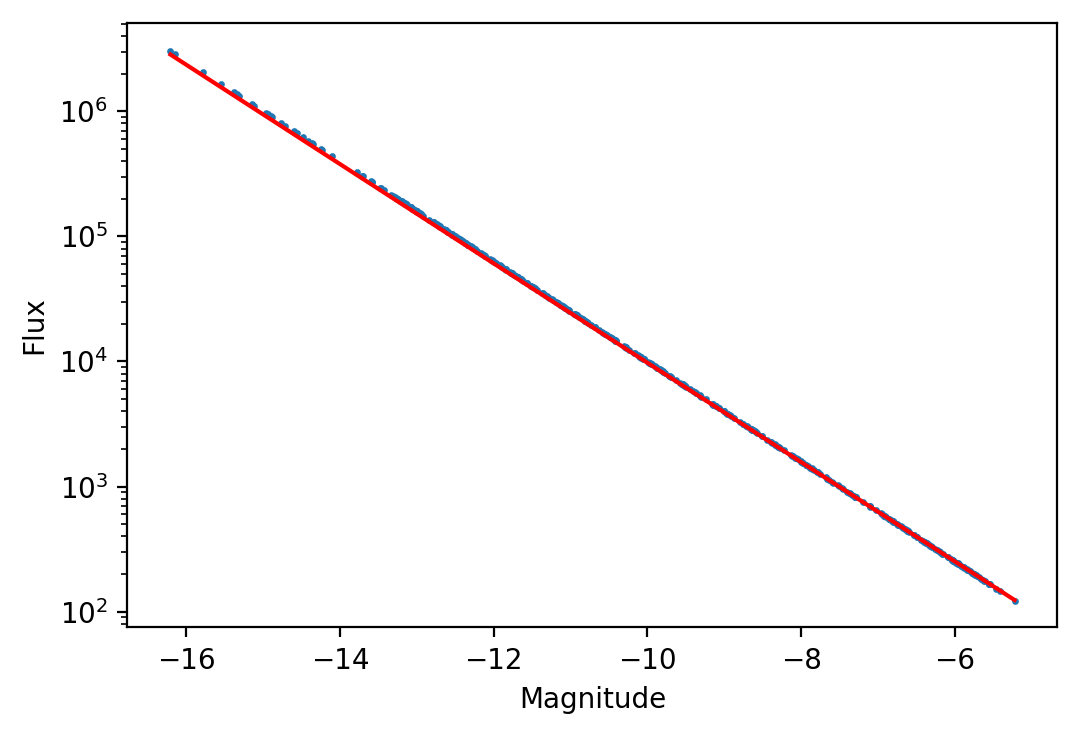

In [12]:
plt.figure(dpi=200)
plt.plot(x_mag, y_mag, color='red')
plt.scatter(mags, flux, s=2)
plt.yscale('log')
plt.xlabel("Magnitude")
plt.ylabel("Flux")
plt.show()

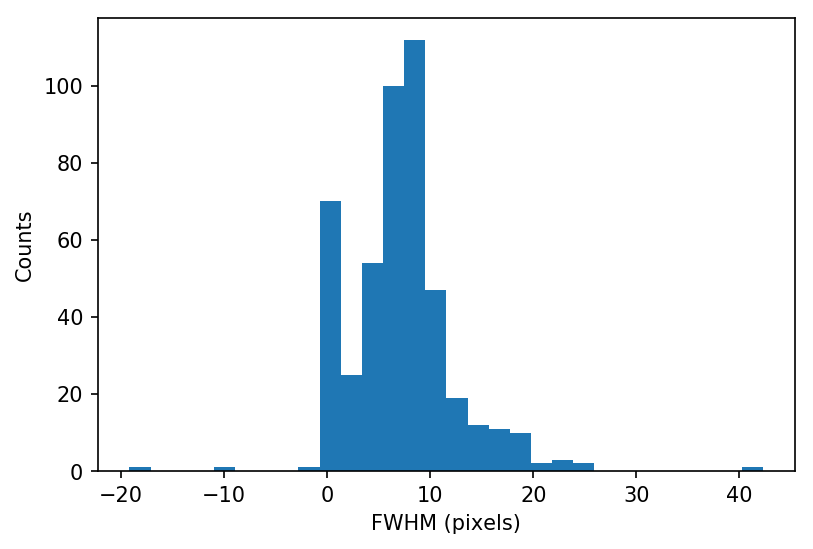

8.313406326034062
4.480745188920905


In [13]:
fwhm = catalog[:,12]

plt.figure(dpi=150)
plt.hist(fwhm, 30)
plt.xlabel('FWHM (pixels)')
plt.ylabel('Counts')
plt.show()

mean_fwhm = np.mean(fwhm[fwhm>0])
std_fwhm = np.std(fwhm[fwhm>0])
print(mean_fwhm)
print(std_fwhm)

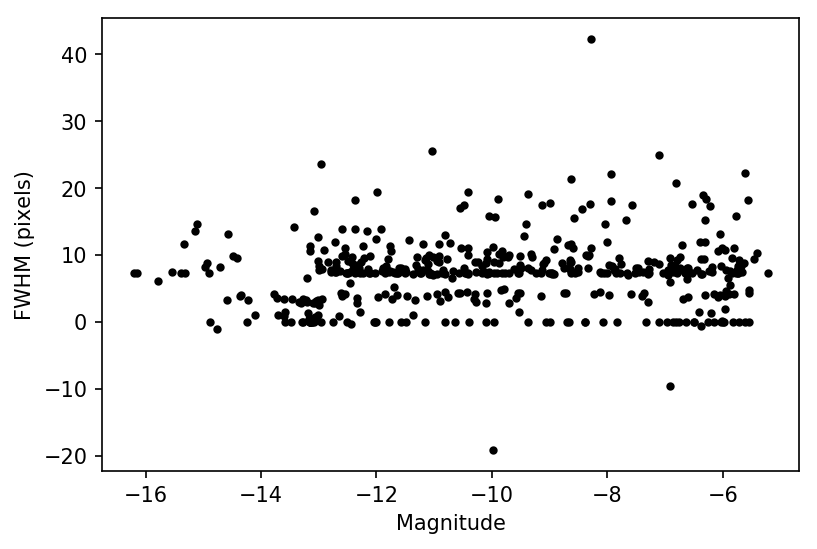

In [14]:
plt.figure(dpi=150)
plt.plot(mag_sorted, fwhm, 'k.')
plt.xlabel("Magnitude")
plt.ylabel("FWHM (pixels)")
plt.show()

In [15]:
bg = catalog[:,13]

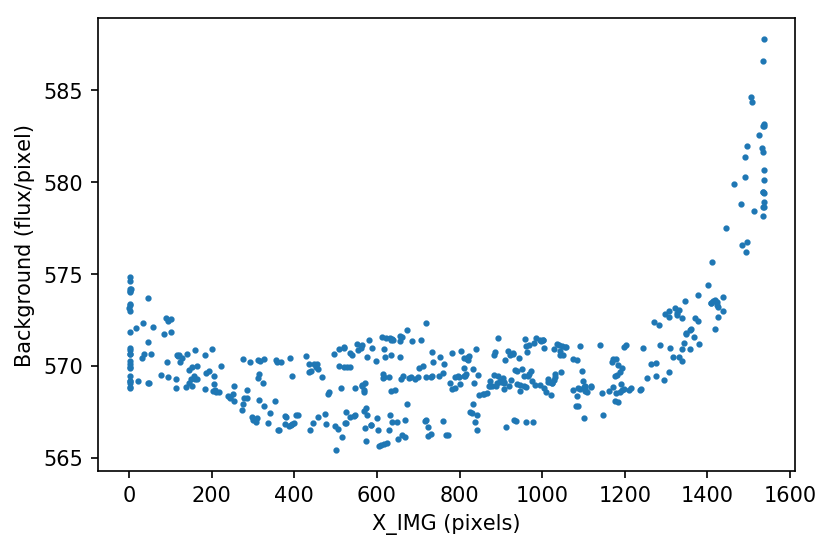

In [16]:
plt.figure(dpi=150)
plt.scatter(x, bg, s=4)
plt.xlabel("X_IMG (pixels)")
plt.ylabel("Background (flux/pixel)")
plt.show()

In [17]:
mean = np.mean(bg)
std = np.std(bg)

print("mean:", mean)
print("standard dev:", std)

mean: 570.3387658174098
standard dev: 3.2868164128536215


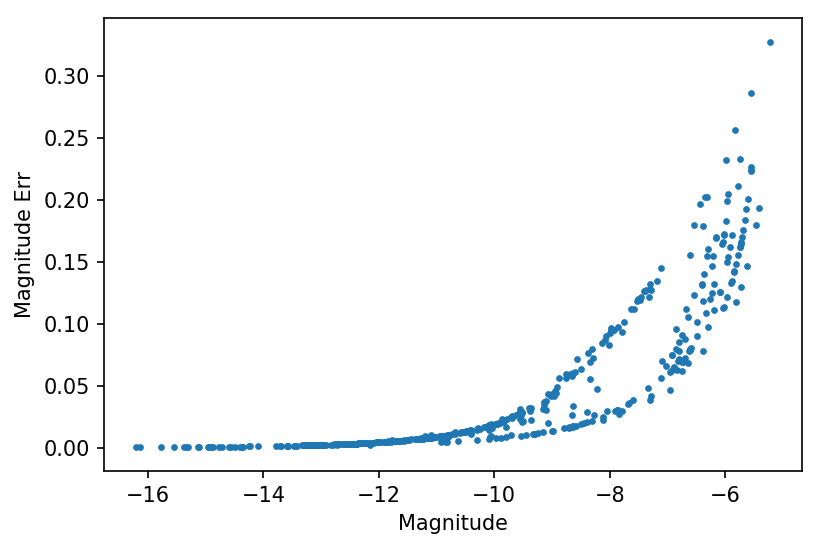

In [18]:
plt.figure(dpi=150)
plt.scatter(mags, mag_errs, s=5)
plt.xlabel("Magnitude")
plt.ylabel("Magnitude Err")
plt.show()

In [19]:
#may not need this
header = fits.open(imagefile)[0].header
gain = header['EGAIN']
npix = np.pi*np.power(fwhm/2, 2)
nphot = gain*(flux+npix*bg)

In [20]:
int_mags = np.arange(int(np.amin(mags)), int(np.amax(mags)) + 1)
int_mag_errs = (1.086/2.36)*np.sqrt(2.36*np.power(10,-.397*int_mags+.02)+72784)/np.power(10, -.397*int_mags+.02)

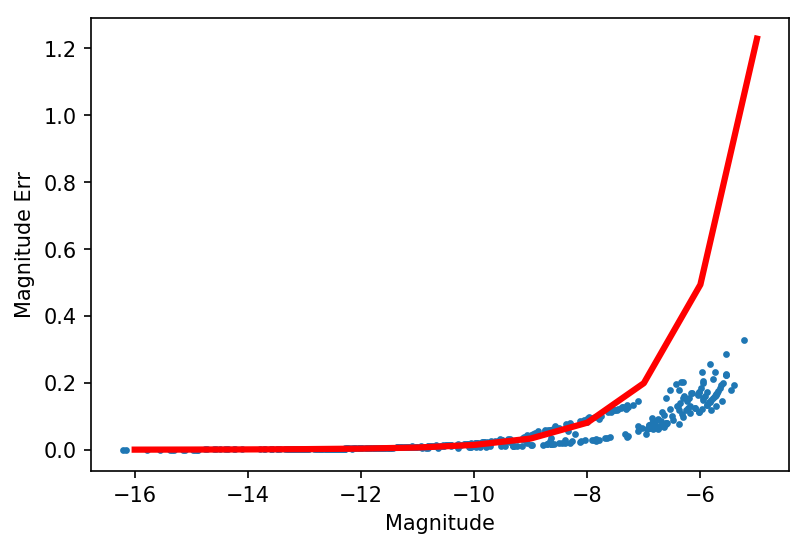

In [21]:
plt.figure(dpi=150)
plt.scatter(mags, mag_errs, s=5)
plt.plot(int_mags, int_mag_errs, 'r-', linewidth=3)
plt.xlabel("Magnitude")
plt.ylabel("Magnitude Err")
plt.show()

In [22]:
mags_aper = catalog[:,9]

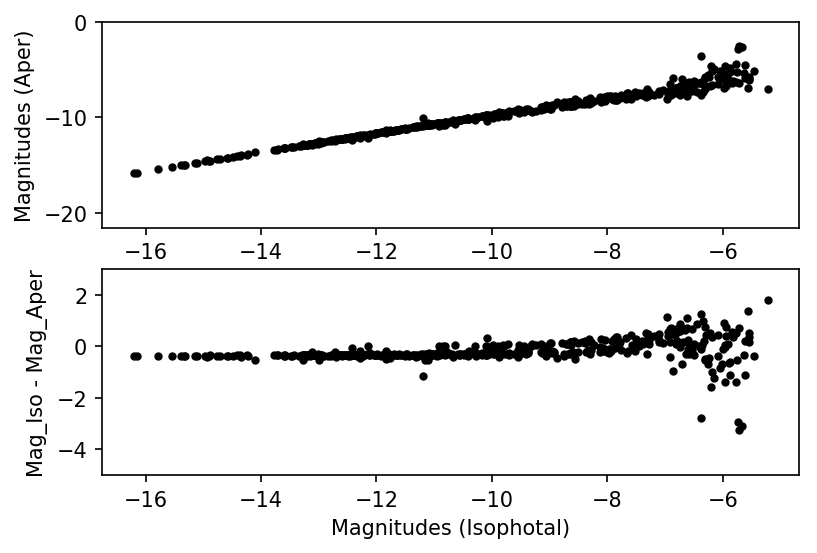

In [23]:
plt.figure(dpi=150)

plt.subplot(2, 1, 1)
plt.plot(mags, mags_aper, 'k.')
plt.ylim(top=0)
plt.ylabel("Magnitudes (Aper)")

plt.subplot(2, 1, 2)
plt.plot(mags, mags-mags_aper, 'k.')
plt.ylim(-5, 3)
plt.ylabel("Mag_Iso - Mag_Aper")

plt.xlabel("Magnitudes (Isophotal)")

plt.show()

In [24]:
mag_diffs = mags - mags_aper
mag_diffs = mag_diffs[mag_diffs >-4]
print(max(mag_diffs) - min(mag_diffs))

5.0817


In [25]:
mag_errs_aper = catalog[:,10]
print("max error (aperture): ", max(mag_errs_aper[mag_errs_aper<90]))
print(np.mean(mag_errs_aper[mag_errs_aper<90]))

print("max error (isophotal): ", max(mag_errs))

max error (aperture):  8.1494
0.1307065502183406
max error (isophotal):  0.3276


In [26]:
sorted_idx_aper = np.argsort(mags_aper[mags_aper<0])[-3:]
print(sorted_idx_aper)
xs_outlier = x[sorted_idx_aper]
ys_outlier = y[sorted_idx_aper]

print("xs: ", xs_outlier)
print("ys: ", ys_outlier)

[217  35  52]
xs:  [298.3986 616.017  722.5679]
ys:  [ 487.2194    1.1981 1022.2255]


In [27]:
catalogfile2 = os.path.join(os.getcwd(), 'clustermatch_1_2.cat')
catalog2 = np.loadtxt(catalogfile2)
x1_match = catalog2[:,1]
y1_match = catalog2[:,2]
x2_match = catalog2[:,16]
y2_match = catalog2[:,17]

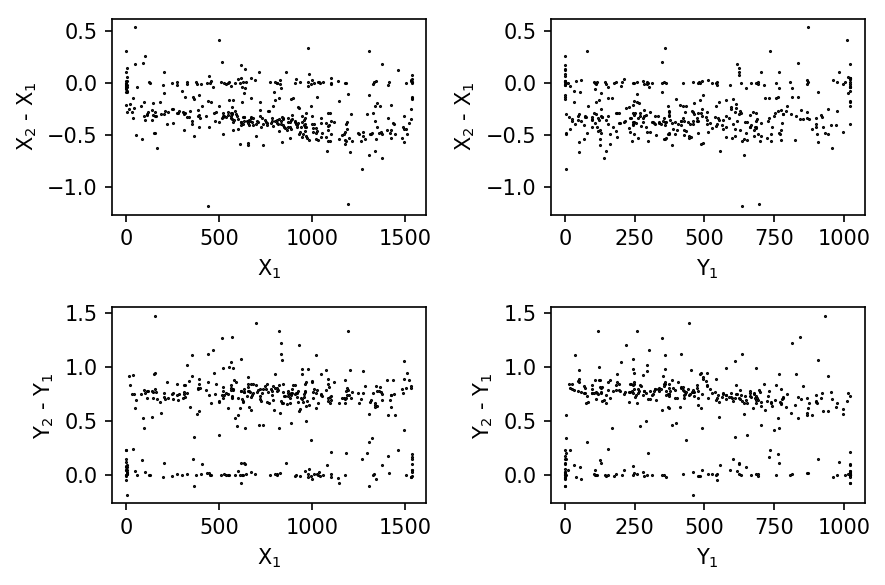

In [28]:
plt.figure(dpi=150)

plt.subplot(2, 2, 1)
plt.plot(x1_match, x2_match-x1_match, 'k.', markersize=1)
plt.xlabel("X$_1$")
plt.ylabel("X$_2$ - X$_1$")

plt.subplot(2, 2, 2)
plt.plot(y1_match, x2_match-x1_match, 'k.', markersize=1)
plt.xlabel("Y$_1$")
plt.ylabel("X$_2$ - X$_1$")

plt.subplot(2, 2, 3)
plt.plot(x1_match, y2_match-y1_match, 'k.', markersize=1)
plt.xlabel("X$_1$")
plt.ylabel("Y$_2$ - Y$_1$")

plt.subplot(2, 2, 4)
plt.plot(y1_match, y2_match-y1_match, 'k.', markersize=1)
plt.xlabel("Y$_1$")
plt.ylabel("Y$_2$ - Y$_1$")

plt.tight_layout()

plt.show()


In [44]:
mags_iso1 = catalog2[:,5]
mags_iso2 = catalog2[:,20]

In [45]:
def mag_err(mag):
    return 1.086*np.sqrt(2.36*np.power(10, -.397*mag+.02)+72784)/np.power(10, -.397*mag+.02)/2.36

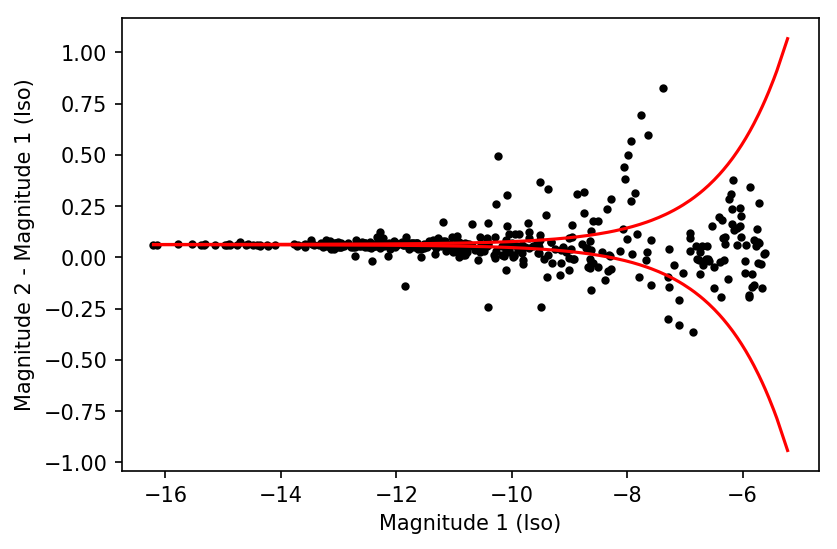

In [46]:
plt.figure(dpi=150)
plt.plot(mags_iso1, mags_iso2 - mags_iso1, 'k.')
plt.xlabel("Magnitude 1 (Iso)")
plt.ylabel("Magnitude 2 - Magnitude 1 (Iso)")

plt.plot(mag_sorted, np.mean(mags_iso2-mags_iso1) + mag_err(mag_sorted), 'r')
plt.plot(mag_sorted, np.mean(mags_iso2-mags_iso1) - mag_err(mag_sorted), 'r')

plt.show()

In [47]:
mags_aper1 = catalog2[:,9]
mags_aper2 = catalog2[:,24]

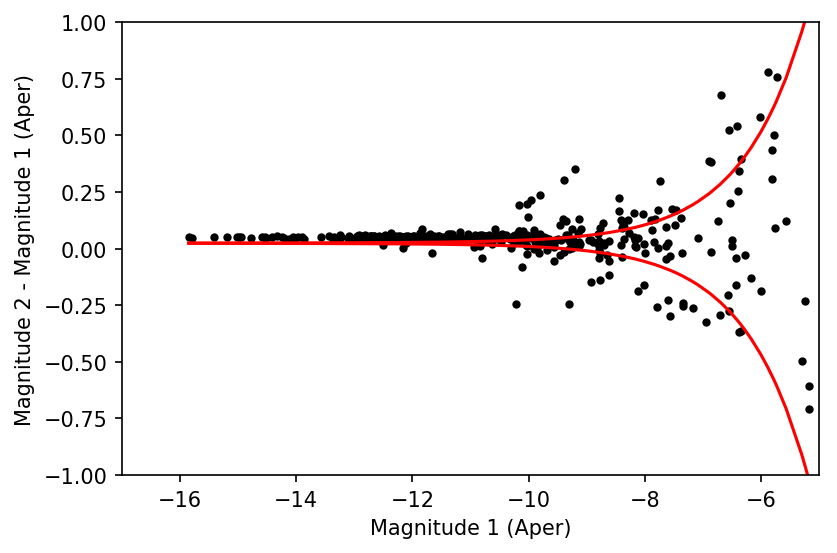

In [70]:
plt.figure(dpi=150)
plt.plot(mags_aper1, mags_aper2 - mags_aper1, 'k.')
plt.xlabel("Magnitude 1 (Aper)")
plt.ylabel("Magnitude 2 - Magnitude 1 (Aper)")
plt.xlim(-17, -5)
plt.ylim(-1, 1)

#sort:
mags_sorted_idx_aper = np.argsort(mags_aper1)
mag_sorted_aper = mags_aper1[mags_sorted_idx_aper]

plt.plot(mag_sorted_aper, np.mean(mags_aper2-mags_aper1) + mag_err(mag_sorted_aper), 'r')
plt.plot(mag_sorted_aper, np.mean(mags_aper2-mags_aper1) - mag_err(mag_sorted_aper), 'r')

plt.show()

In [71]:
outlier_idx = np.where(mags_aper2 - mags_aper1 > 1)[0]
outlier_x = x1_match[outlier_idx]
outlier_y = y1_match[outlier_idx]

#we also checked outliers with magnitude=100

print(outlier_x)
print(outlier_y)

[300.0554   1.791    1.9529]
[1024.      593.9964  458.9642]
